In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.util.testing import assert_frame_equal

import pandas_datareader
import datetime

import pandas_datareader.data as web

/home/varan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


In [2]:
start = datetime.datetime(2015, 5, 20)
end = datetime.datetime(2020, 5, 20)
benz = web.DataReader("DDAIF", 'yahoo', start, end)

In [3]:
benz.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-19,99.750000,99.089996,99.370003,99.349998,37600.0,79.342392
2015-05-20,100.000000,99.260002,99.540001,99.820000,18400.0,79.717728
2015-05-21,100.320000,99.680000,99.820000,100.320000,34100.0,80.117035
2015-05-22,99.169998,98.669998,99.050003,99.019997,19600.0,79.078835
2015-05-26,97.010002,95.779999,96.870003,96.349998,31500.0,76.946533


In [4]:
audi = web.DataReader("AUDVF", 'yahoo', start, end)
honda = web.DataReader("HMC", 'yahoo', start, end)

In [5]:
benz.to_csv('Benz_Stock.csv')
audi.to_csv('Audi_Stock.csv')
honda.to_csv('Honda_Stock.csv')

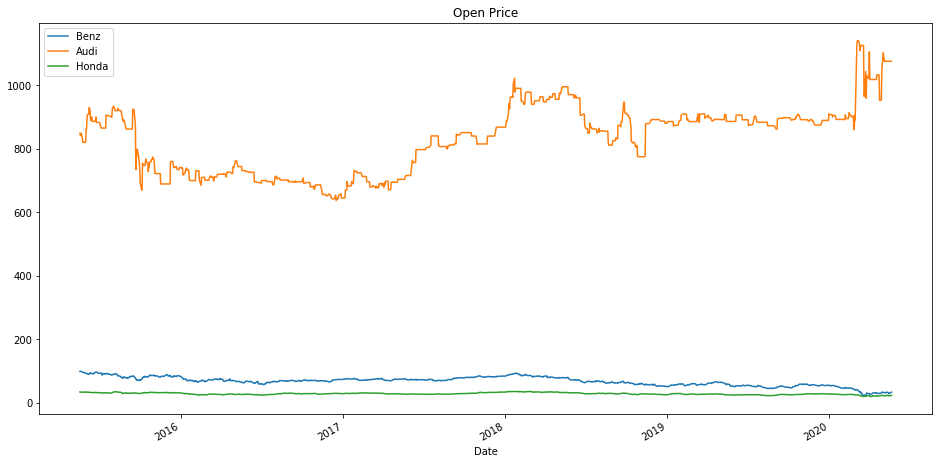

In [6]:
benz['Open'].plot(label='Benz',figsize=(16,8),title='Open Price')
audi['Open'].plot(label='Audi')
honda['Open'].plot(label='Honda')
plt.legend()

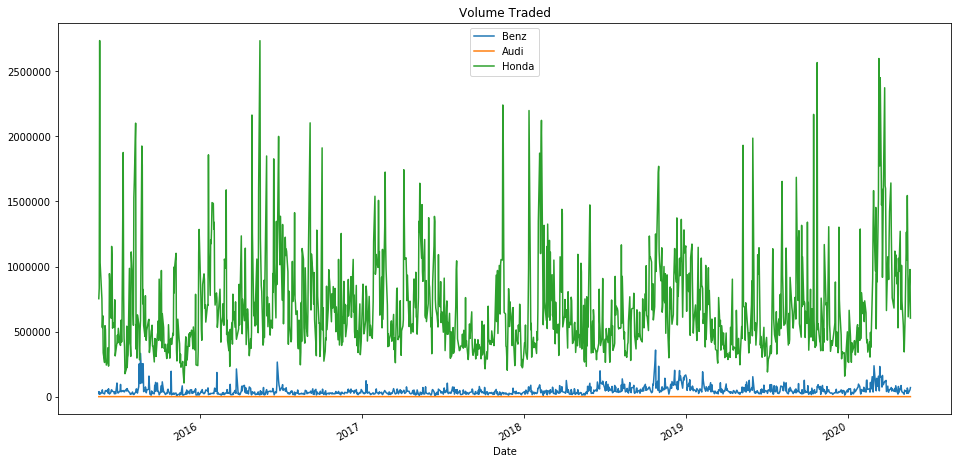

In [7]:
benz['Volume'].plot(label='Benz',figsize=(16,8),title='Volume Traded')
audi['Volume'].plot(label='Audi')
honda['Volume'].plot(label='Honda')
plt.legend()

In [8]:
benz['Volume'].argmax()

866

In [9]:
audi['Volume'].argmax()

324

In [10]:
honda['Volume'].argmax()

2

In [11]:
benz['Total Traded'] = benz['Open']*benz['Volume']
audi['Total Traded'] = audi['Open']*audi['Volume']
honda['Total Traded'] = honda['Open']*honda['Volume']

Text(0, 0.5, 'Total Traded')

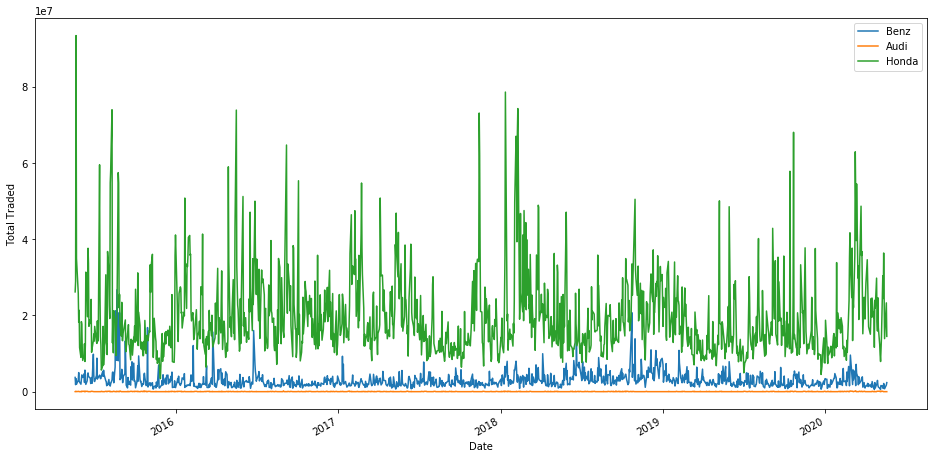

In [12]:
benz['Total Traded'].plot(label='Benz',figsize=(16,8))
audi['Total Traded'].plot(label='Audi')
honda['Total Traded'].plot(label='Honda')
plt.legend()
plt.ylabel('Total Traded')

In [47]:
benz['Total Traded'].argmax()

66

In [46]:
audi['Total Traded'].argmax()

1211

In [15]:
honda['Total Traded'].argmax()

2

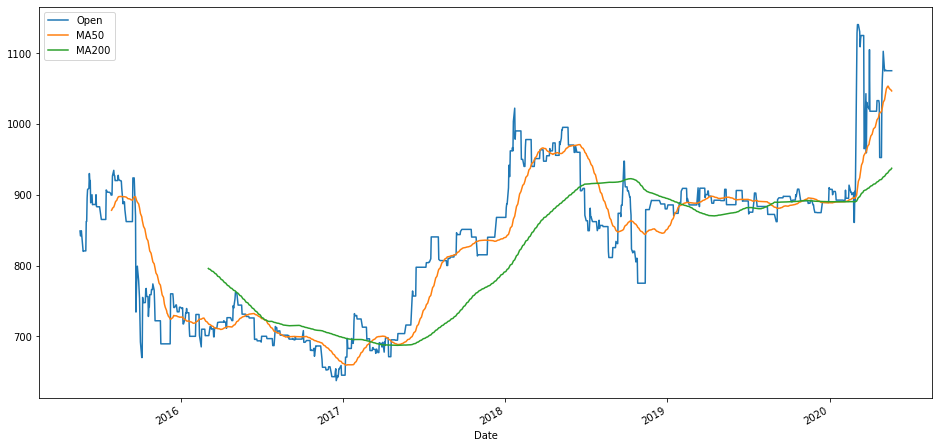

In [16]:
audi['MA50'] = audi['Open'].rolling(50).mean()
audi['MA200'] = audi['Open'].rolling(200).mean()
audi[['Open','MA50','MA200']].plot(label='Audi',figsize=(16,8))

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
car_comp = pd.concat([benz['Open'],audi['Open'],honda['Open']],axis=1)

In [19]:
car_comp.columns = ['Benz Open','Audi Open','Honda Open']

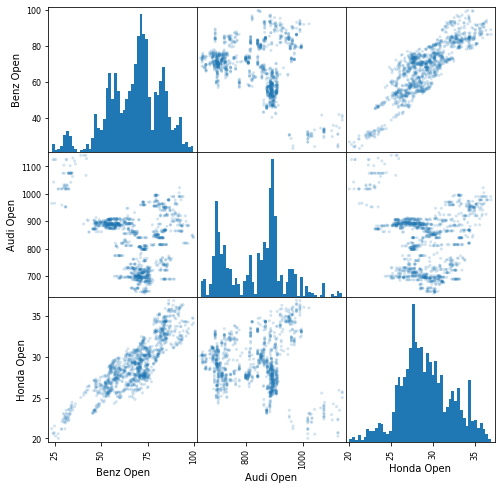

In [20]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [21]:
benz['returns'] = (benz['Close'] / benz['Close'].shift(1) ) - 1

In [22]:
benz.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2015-05-19,99.750000,99.089996,99.370003,99.349998,37600.0,79.342392,3.736312e+06,NaN
2015-05-20,100.000000,99.260002,99.540001,99.820000,18400.0,79.717728,1.831536e+06,0.004731
2015-05-21,100.320000,99.680000,99.820000,100.320000,34100.0,80.117035,3.403862e+06,0.005009
2015-05-22,99.169998,98.669998,99.050003,99.019997,19600.0,79.078835,1.941380e+06,-0.012959
2015-05-26,97.010002,95.779999,96.870003,96.349998,31500.0,76.946533,3.051405e+06,-0.026964


In [23]:
benz['returns'] = benz['Close'].pct_change(1)

In [24]:
# Now repeat for the other dataframes
audi['returns'] = audi['Close'].pct_change(1)
honda['returns'] = honda['Close'].pct_change(1)

In [25]:
audi.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2015-05-19,848.780029,848.780029,848.780029,848.780029,0.0,835.661682,0.000000,NaN,NaN,NaN
2015-05-20,841.750000,841.750000,841.750000,841.750000,100.0,828.740356,84175.000000,NaN,NaN,-0.008283
2015-05-21,849.000000,842.250000,842.250000,849.000000,100.0,835.878357,84225.000000,NaN,NaN,0.008613
2015-05-22,849.000000,849.000000,849.000000,849.000000,0.0,835.878357,0.000000,NaN,NaN,0.000000
2015-05-26,819.950012,819.950012,819.950012,819.950012,100.0,807.277283,81995.001221,NaN,NaN,-0.034217


In [26]:
honda.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2015-05-19,35.000000,34.730000,34.790001,34.860001,752800.0,29.777750,2.618991e+07,NaN
2015-05-20,34.720001,34.459999,34.720001,34.650002,832900.0,29.598364,2.891829e+07,-0.006024
2015-05-21,34.380001,33.910000,34.160000,34.139999,2736400.0,29.162714,9.347542e+07,-0.014719
2015-05-22,34.279999,33.930000,33.930000,34.119999,1029700.0,29.145630,3.493772e+07,-0.000586
2015-05-26,34.270000,33.820000,34.270000,33.980000,754600.0,29.026041,2.586014e+07,-0.004103


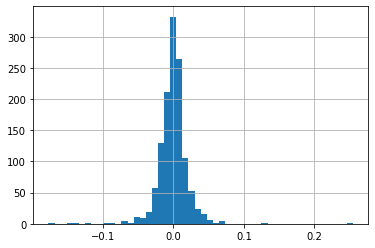

In [27]:
benz['returns'].hist(bins = 50)

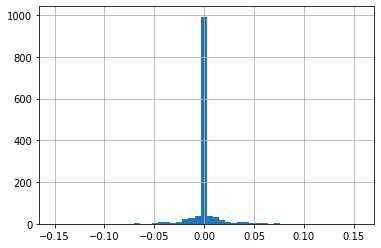

In [28]:
audi['returns'].hist(bins = 50)

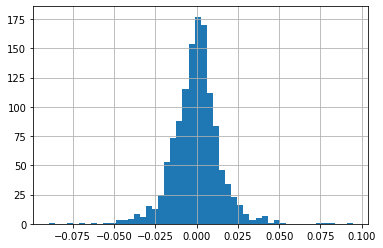

In [29]:
honda['returns'].hist(bins = 50)

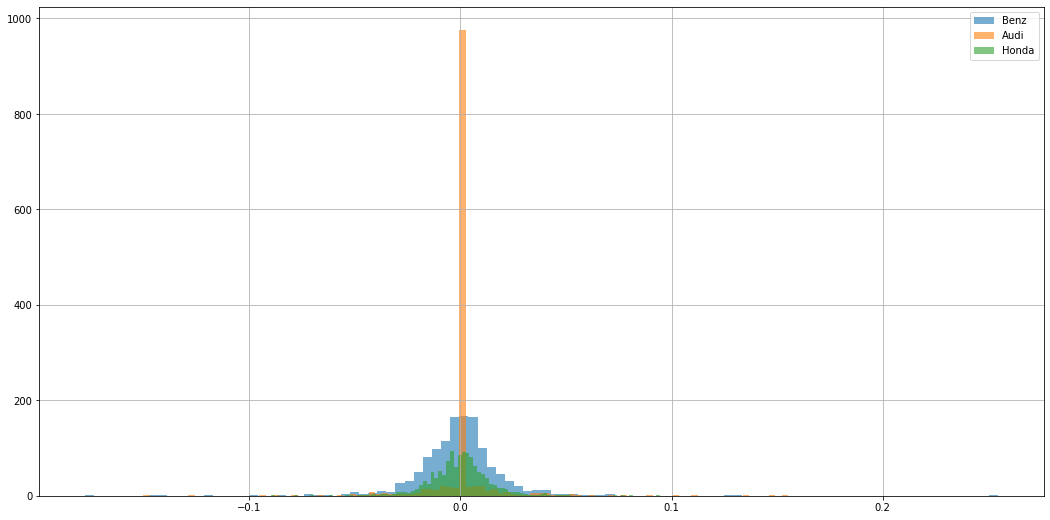

In [30]:
benz['returns'].hist(bins=100,label='Benz',figsize=(18,9),alpha=0.6)
audi['returns'].hist(bins=100,label='Audi',alpha=0.6)
honda['returns'].hist(bins=100,label='Honda',alpha=0.6)
plt.legend()

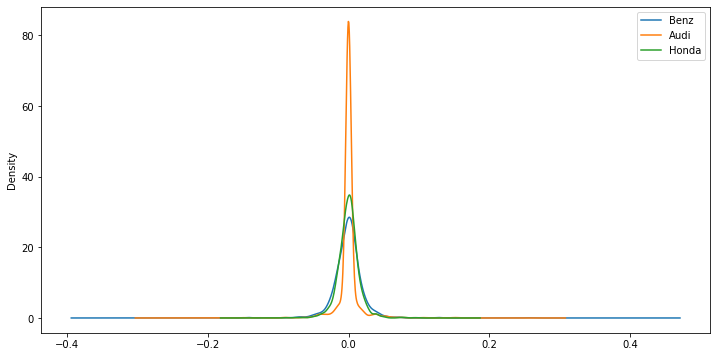

In [52]:
benz['returns'].plot(kind='kde',label='Benz',figsize=(12,6))
audi['returns'].plot(kind='kde',label='Audi')
honda['returns'].plot(kind='kde',label='Honda')
plt.legend()

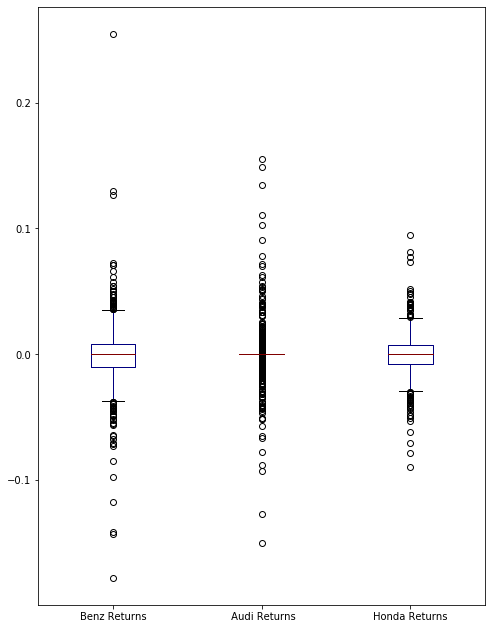

In [32]:
box_df = pd.concat([benz['returns'],audi['returns'],honda['returns']],axis=1)
box_df.columns = ['Benz Returns',' Audi Returns','Honda Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

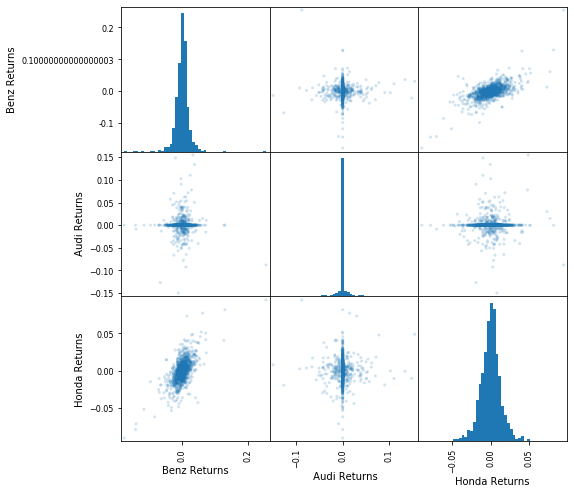

In [33]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

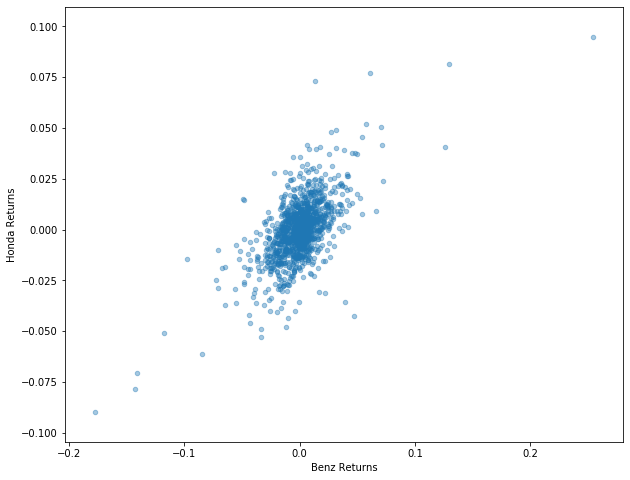

In [34]:
box_df.plot(kind='scatter',x='Benz Returns',y='Honda Returns',alpha=0.4,figsize=(10,8))

In [35]:
benz['Cumulative Return'] = (1 + benz['returns']).cumprod()

In [36]:
benz.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2015-05-19,99.750000,99.089996,99.370003,99.349998,37600.0,79.342392,3.736312e+06,NaN,NaN
2015-05-20,100.000000,99.260002,99.540001,99.820000,18400.0,79.717728,1.831536e+06,0.004731,1.004731
2015-05-21,100.320000,99.680000,99.820000,100.320000,34100.0,80.117035,3.403862e+06,0.005009,1.009763
2015-05-22,99.169998,98.669998,99.050003,99.019997,19600.0,79.078835,1.941380e+06,-0.012959,0.996678
2015-05-26,97.010002,95.779999,96.870003,96.349998,31500.0,76.946533,3.051405e+06,-0.026964,0.969804


In [37]:
audi['Cumulative Return'] = (1 + audi['returns']).cumprod()
honda['Cumulative Return'] = (1 + honda['returns']).cumprod()

In [38]:
audi.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2015-05-19,848.780029,848.780029,848.780029,848.780029,0.0,835.661682,0.000000,NaN,NaN,NaN,NaN
2015-05-20,841.750000,841.750000,841.750000,841.750000,100.0,828.740356,84175.000000,NaN,NaN,-0.008283,0.991717
2015-05-21,849.000000,842.250000,842.250000,849.000000,100.0,835.878357,84225.000000,NaN,NaN,0.008613,1.000259
2015-05-22,849.000000,849.000000,849.000000,849.000000,0.0,835.878357,0.000000,NaN,NaN,0.000000,1.000259
2015-05-26,819.950012,819.950012,819.950012,819.950012,100.0,807.277283,81995.001221,NaN,NaN,-0.034217,0.966034


In [39]:
honda.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2015-05-19,35.000000,34.730000,34.790001,34.860001,752800.0,29.777750,2.618991e+07,NaN,NaN
2015-05-20,34.720001,34.459999,34.720001,34.650002,832900.0,29.598364,2.891829e+07,-0.006024,0.993976
2015-05-21,34.380001,33.910000,34.160000,34.139999,2736400.0,29.162714,9.347542e+07,-0.014719,0.979346
2015-05-22,34.279999,33.930000,33.930000,34.119999,1029700.0,29.145630,3.493772e+07,-0.000586,0.978772
2015-05-26,34.270000,33.820000,34.270000,33.980000,754600.0,29.026041,2.586014e+07,-0.004103,0.974756


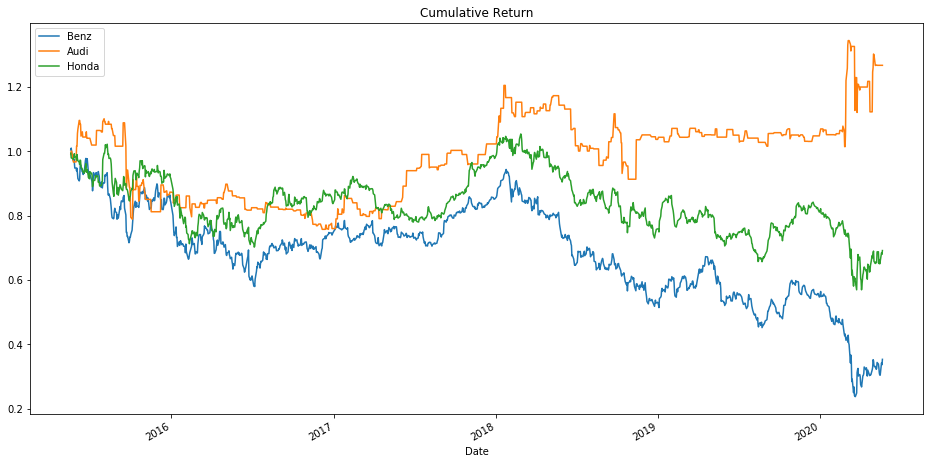

In [40]:
benz['Cumulative Return'].plot(label='Benz',figsize=(16,8),title='Cumulative Return')
audi['Cumulative Return'].plot(label='Audi')
honda['Cumulative Return'].plot(label='Honda')
plt.legend()